## Breat Cancer Prediction

#### This project aims to detect cells growth between benign and malignant. Things could be prevented before the get worst.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'Breast_cancer_dataset.csv'

In [5]:
train_data = pd.read_csv(path)

In [7]:
train_data.sample(3)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
109    864018         B        11.34         21.26           72.48      396.5   
335  89742801         M        17.06         21.00          111.80      918.6   
24     852552         M        16.65         21.38          110.00      904.6   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
109          0.08759           0.06575         0.05133              0.01899   
335          0.11190           0.10560         0.15080              0.09934   
24           0.11210           0.14570         0.15250              0.09170   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
109  ...          29.15            83.99       518.1            0.1699   
335  ...          33.15           143.20      1362.0            0.1449   
24   ...          31.56           177.00      2215.0            0.1805   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
109             0.2196           0.3120               0.08278          0.2829   
335             0.2053           0.3920               0.18270          0.2623   
24              0.3578           0.4695               0.20950          0.3613   

     fractal_dimension_worst  Unnamed: 32  
109                  0.08832          NaN  
335                  0.07599          NaN  
24                   0.09564          NaN  

[3 rows x 33 columns]

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
train_data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [25]:
train_data.drop(columns = 'Unnamed: 32', inplace = True)

In [27]:
train_data.sample(2)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
556  924964         B        10.16         19.59           64.73      311.7   
116  864726         B         8.95         15.76           58.74      245.2   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
556          0.10030           0.07504        0.005025              0.01116   
116          0.09462           0.12430        0.092630              0.02308   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
556  ...        10.650          22.88            67.88       347.3   
116  ...         9.414          17.07            63.34       270.0   

     smoothness_worst  compactness_worst  concavity_worst  \
556            0.1265             0.1200          0.01005   
116            0.1179             0.1879          0.15440   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
556               0.02232          0.2262                  0.06742  
116               0.03846          0.1652                  0.07722  

[2 rows x 32 columns]

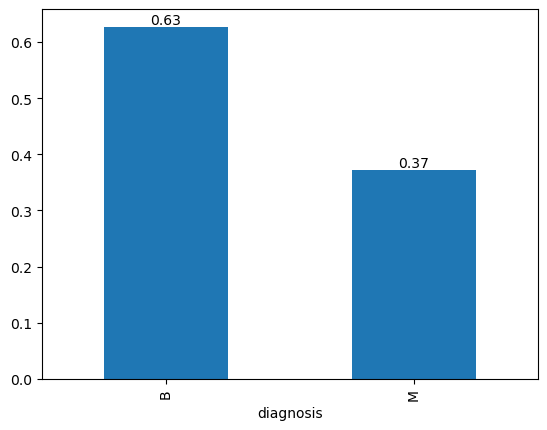

In [42]:
ax = train_data['diagnosis'].value_counts(normalize = True).plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.show()

In [50]:
train_data.describe().round(2)

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count  5.690000e+02       569.00        569.00          569.00     569.00   
mean   3.037183e+07        14.13         19.29           91.97     654.89   
std    1.250206e+08         3.52          4.30           24.30     351.91   
min    8.670000e+03         6.98          9.71           43.79     143.50   
25%    8.692180e+05        11.70         16.17           75.17     420.30   
50%    9.060240e+05        13.37         18.84           86.24     551.10   
75%    8.813129e+06        15.78         21.80          104.10     782.70   
max    9.113205e+08        28.11         39.28          188.50    2501.00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count           569.00            569.00          569.00               569.00   
mean              0.10              0.10            0.09                 0.05   
std               0.01              0.05            0.08                 0.04   
min               0.05              0.02            0.00                 0.00   
25%               0.09              0.06            0.03                 0.02   
50%               0.10              0.09            0.06                 0.03   
75%               0.11              0.13            0.13                 0.07   
max               0.16              0.35            0.43                 0.20   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count         569.00  ...        569.00         569.00           569.00   
mean            0.18  ...         16.27          25.68           107.26   
std             0.03  ...          4.83           6.15            33.60   
min             0.11  ...          7.93          12.02            50.41   
25%             0.16  ...         13.01          21.08            84.11   
50%             0.18  ...         14.97          25.41            97.66   
75%             0.20  ...         18.79          29.72           125.40   
max             0.30  ...         36.04          49.54           251.20   

       area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count      569.00            569.00             569.00           569.00   
mean       880.58              0.13               0.25             0.27   
std        569.36              0.02               0.16             0.21   
min        185.20              0.07               0.03             0.00   
25%        515.30              0.12               0.15             0.11   
50%        686.50              0.13               0.21             0.23   
75%       1084.00              0.15               0.34             0.38   
max       4254.00              0.22               1.06             1.25   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count                569.00          569.00                   569.00  
mean                   0.11            0.29                     0.08  
std                    0.07            0.06                     0.02  
min                    0.00            0.16                     0.06  
25%                    0.06            0.25                     0.07  
50%                    0.10            0.28                     0.08  
75%                    0.16            0.32                     0.09  
max                    0.29            0.66                     0.21  

[8 rows x 31 columns]

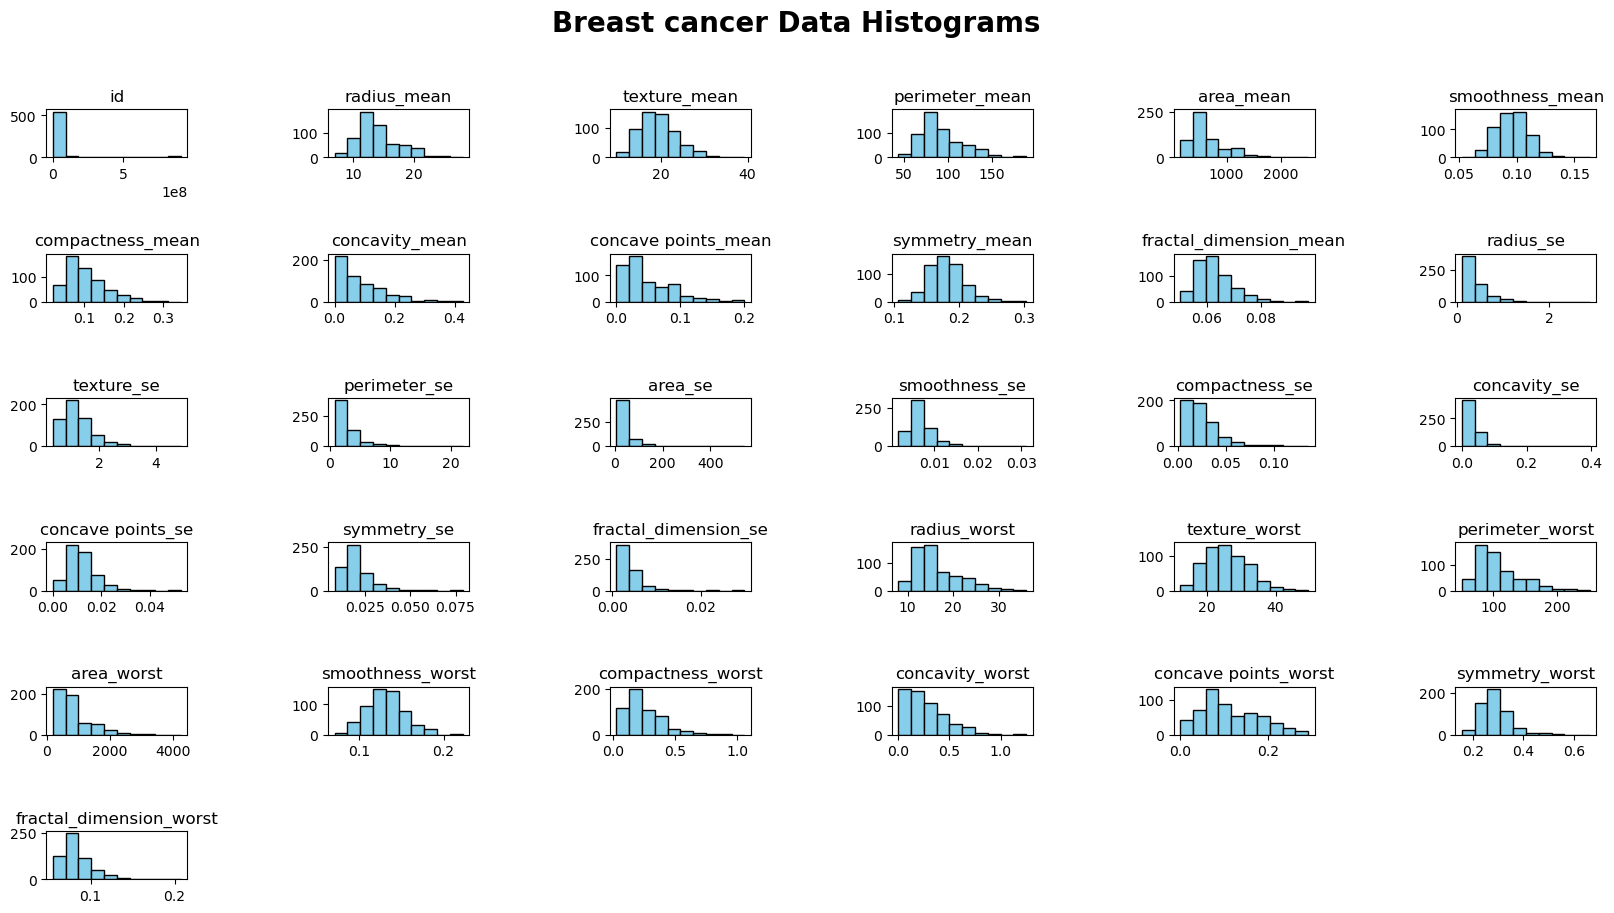

In [52]:
train_data.hist(figsize=(20, 10), grid=False, color='skyblue', edgecolor='black')
plt.subplots_adjust(hspace=2.0, wspace=1.0)  # More space between subplots
plt.suptitle("Breast cancer Data Histograms", fontsize=20, fontweight='bold')
plt.show()

In [60]:
train_data['diagnosis'] = train_data['diagnosis'].map({'B' : 0, 'M' : 1})

In [62]:
train_data.sample(3)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
285  8912521          0        12.58         18.40           79.83      489.0   
160  8711561          0        11.75         20.18           76.10      419.8   
92    861853          0        13.27         14.76           84.74      551.7   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
285          0.08393           0.04216         0.00186             0.002924   
160          0.10890           0.11410         0.06843             0.037380   
92           0.07355           0.05055         0.03261             0.026480   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
285  ...         13.50          23.08            85.56       564.1   
160  ...         13.32          26.21            88.91       543.9   
92   ...         16.36          22.35           104.50       830.6   

     smoothness_worst  compactness_worst  concavity_worst  \
285            0.1038            0.06624         0.005579   
160            0.1358            0.18920         0.195600   
92             0.1006            0.12380         0.135000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
285              0.008772          0.2505                  0.06431  
160              0.079090          0.3168                  0.07987  
92               0.100100          0.2027                  0.06206  

[3 rows x 32 columns]

In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

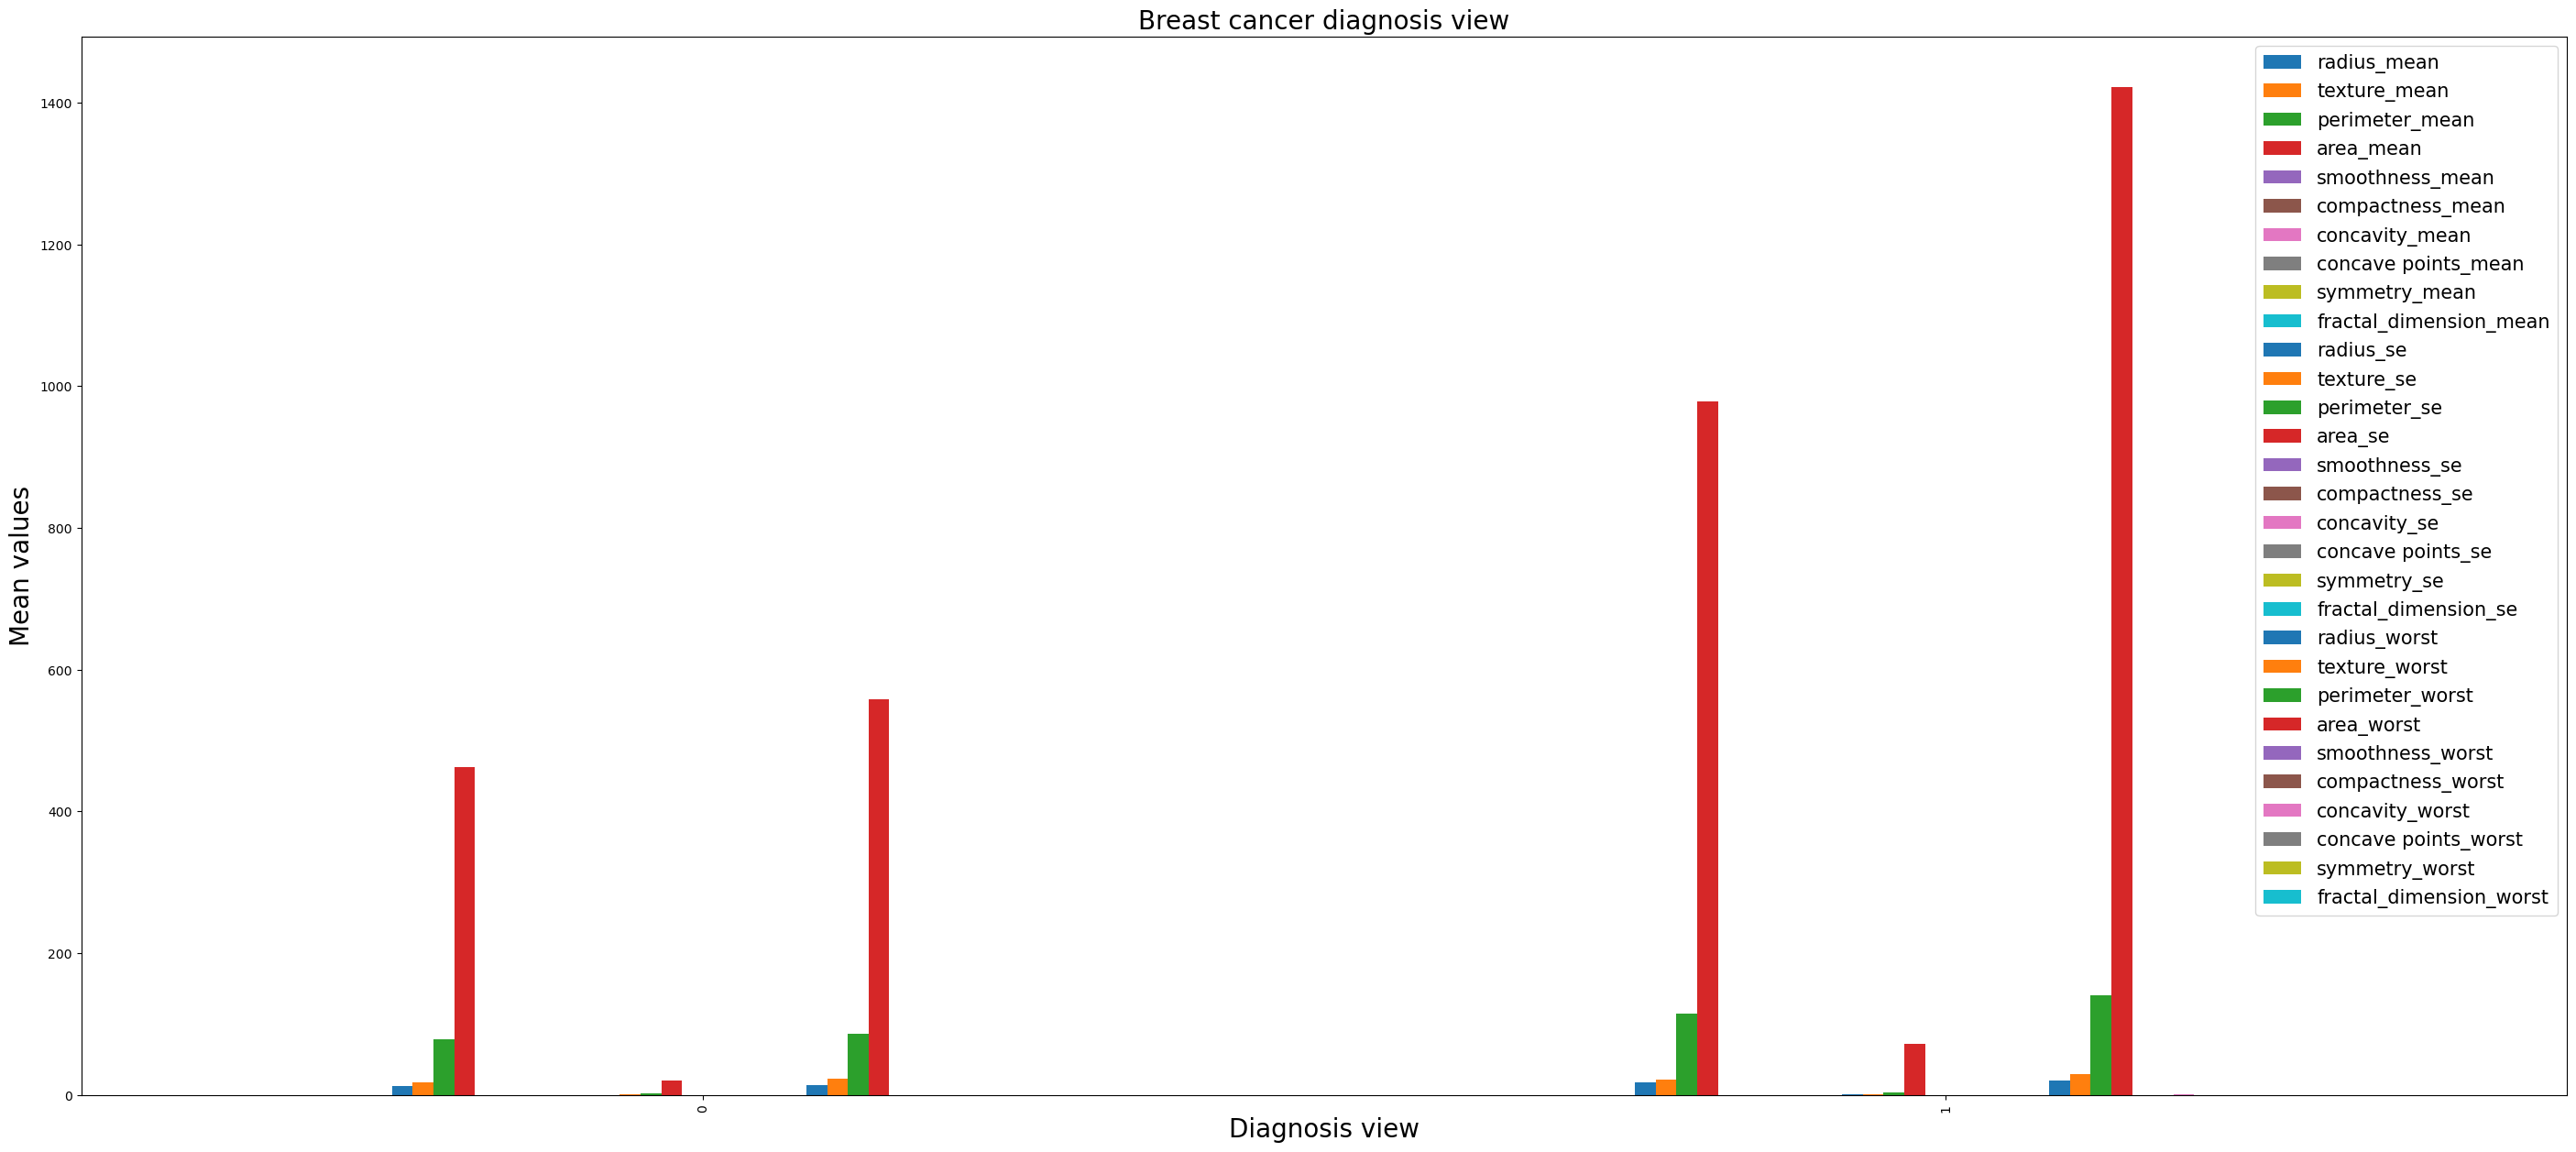

In [68]:
train_data.drop(columns = 'id', axis = 1).groupby('diagnosis').mean().plot(kind = 'bar', figsize = (35, 15))
plt.xlabel('Diagnosis view', fontsize = 20)
plt.ylabel('Mean values', fontsize = 20)
plt.title('Breast cancer diagnosis view', fontsize = 20)
plt.legend(fontsize = 15, loc = 'upper right')
plt.show();

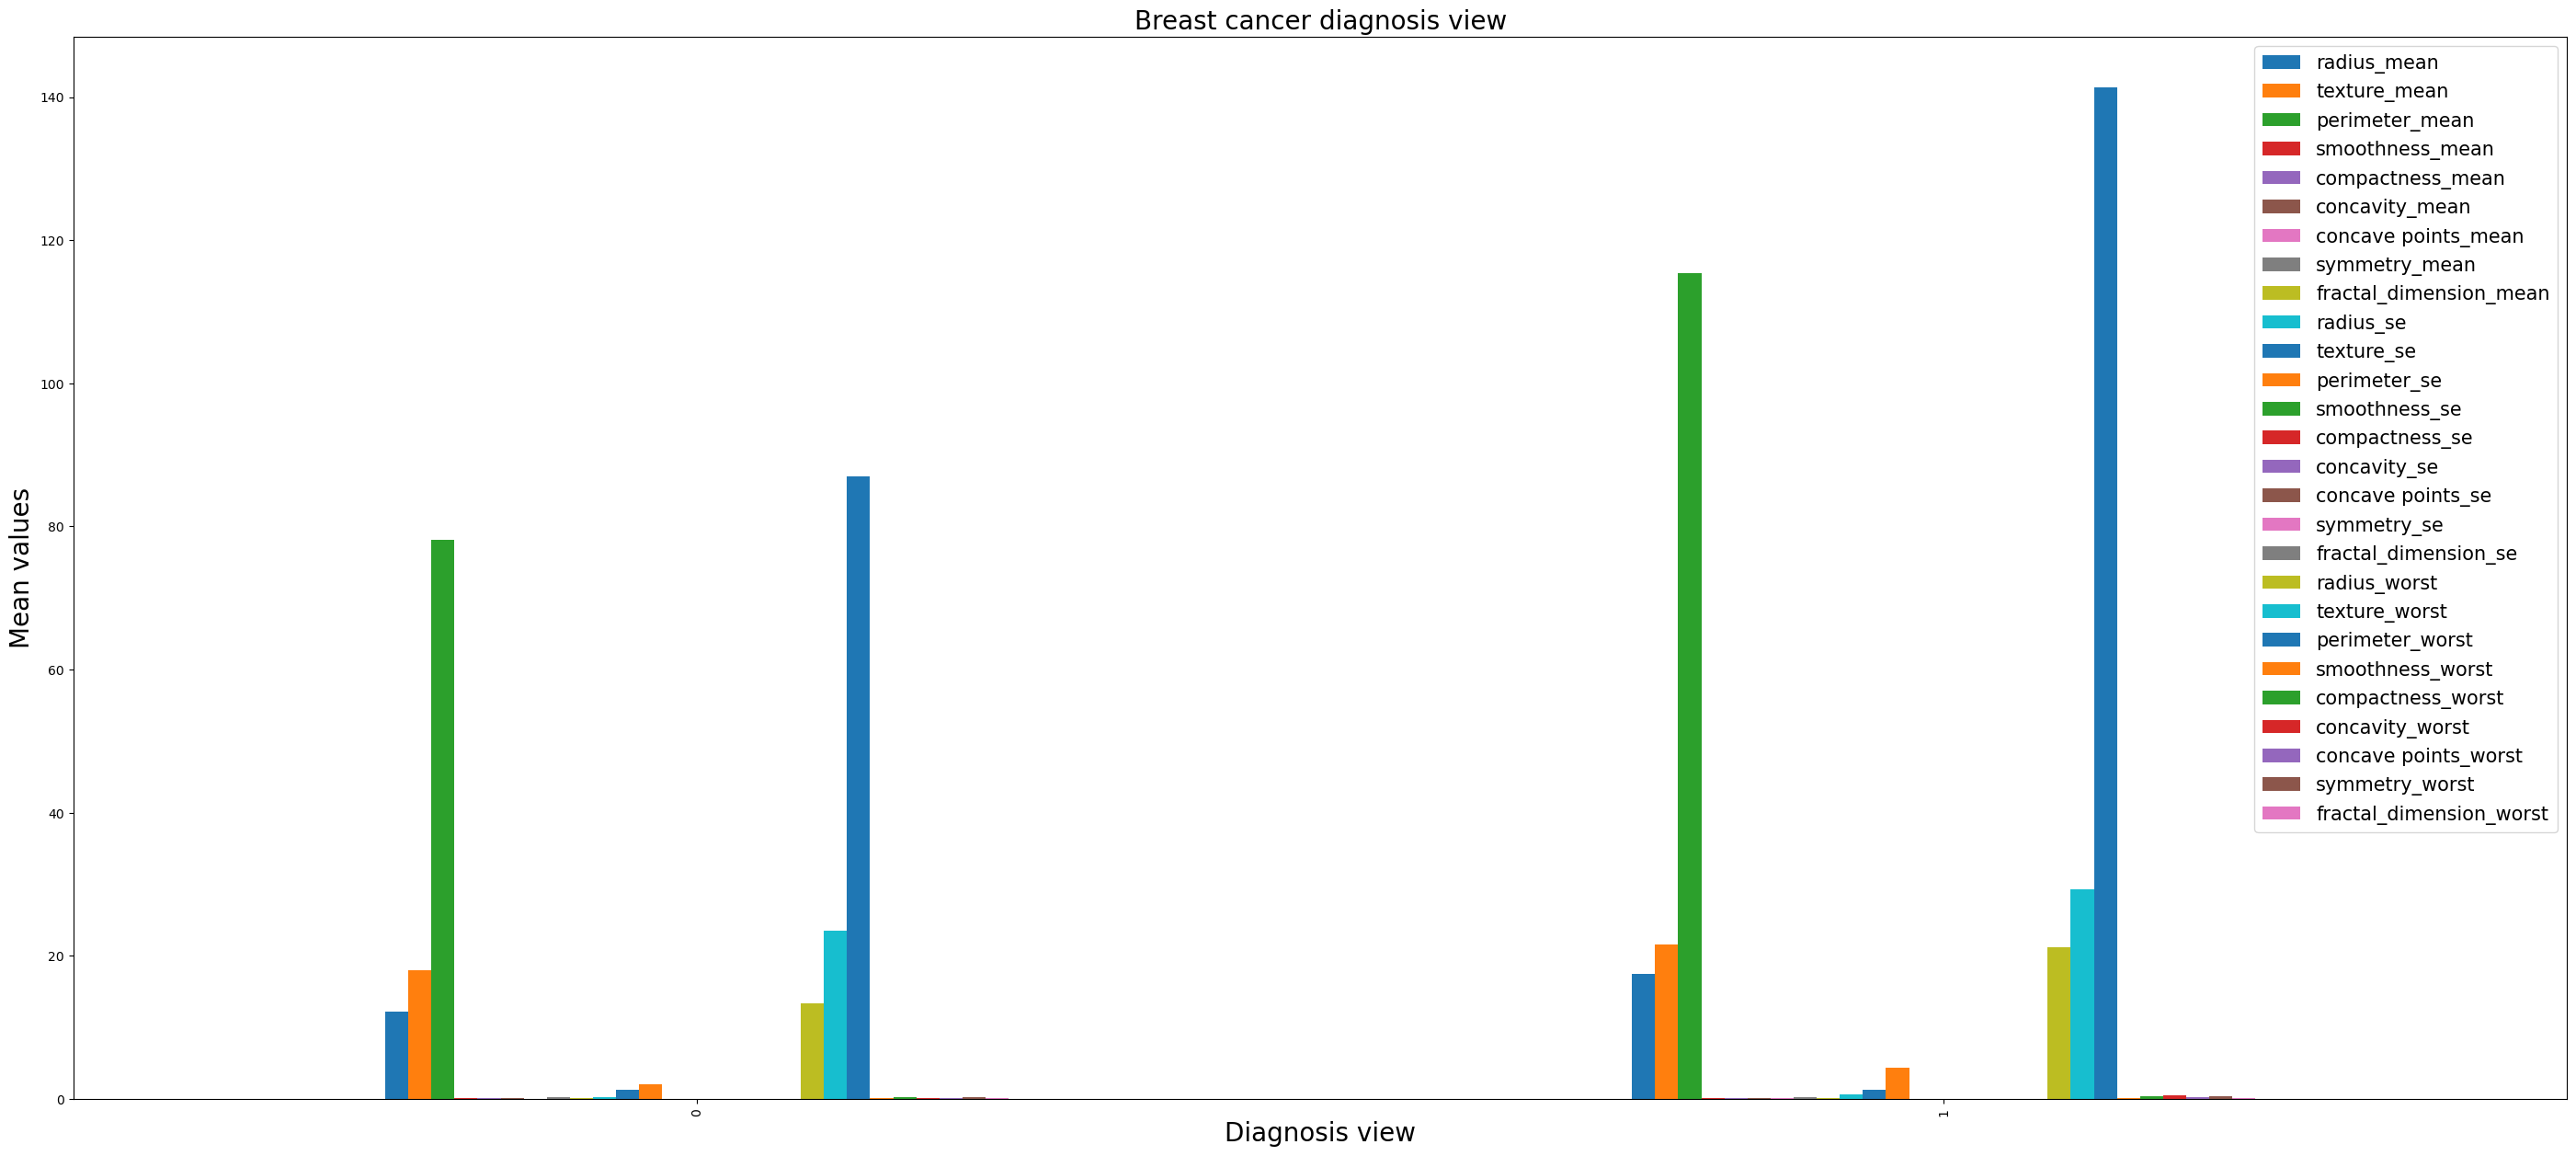

In [70]:
train_data.drop(columns = ['id', 'area_worst', 'area_se', 'area_mean'], axis = 1).groupby('diagnosis').mean().plot(kind = 'bar', figsize = (35, 15))
plt.xlabel('Diagnosis view', fontsize = 20)
plt.ylabel('Mean values', fontsize = 20)
plt.title('Breast cancer diagnosis view', fontsize = 20)
plt.legend(fontsize = 15, loc = 'upper right')
plt.show();

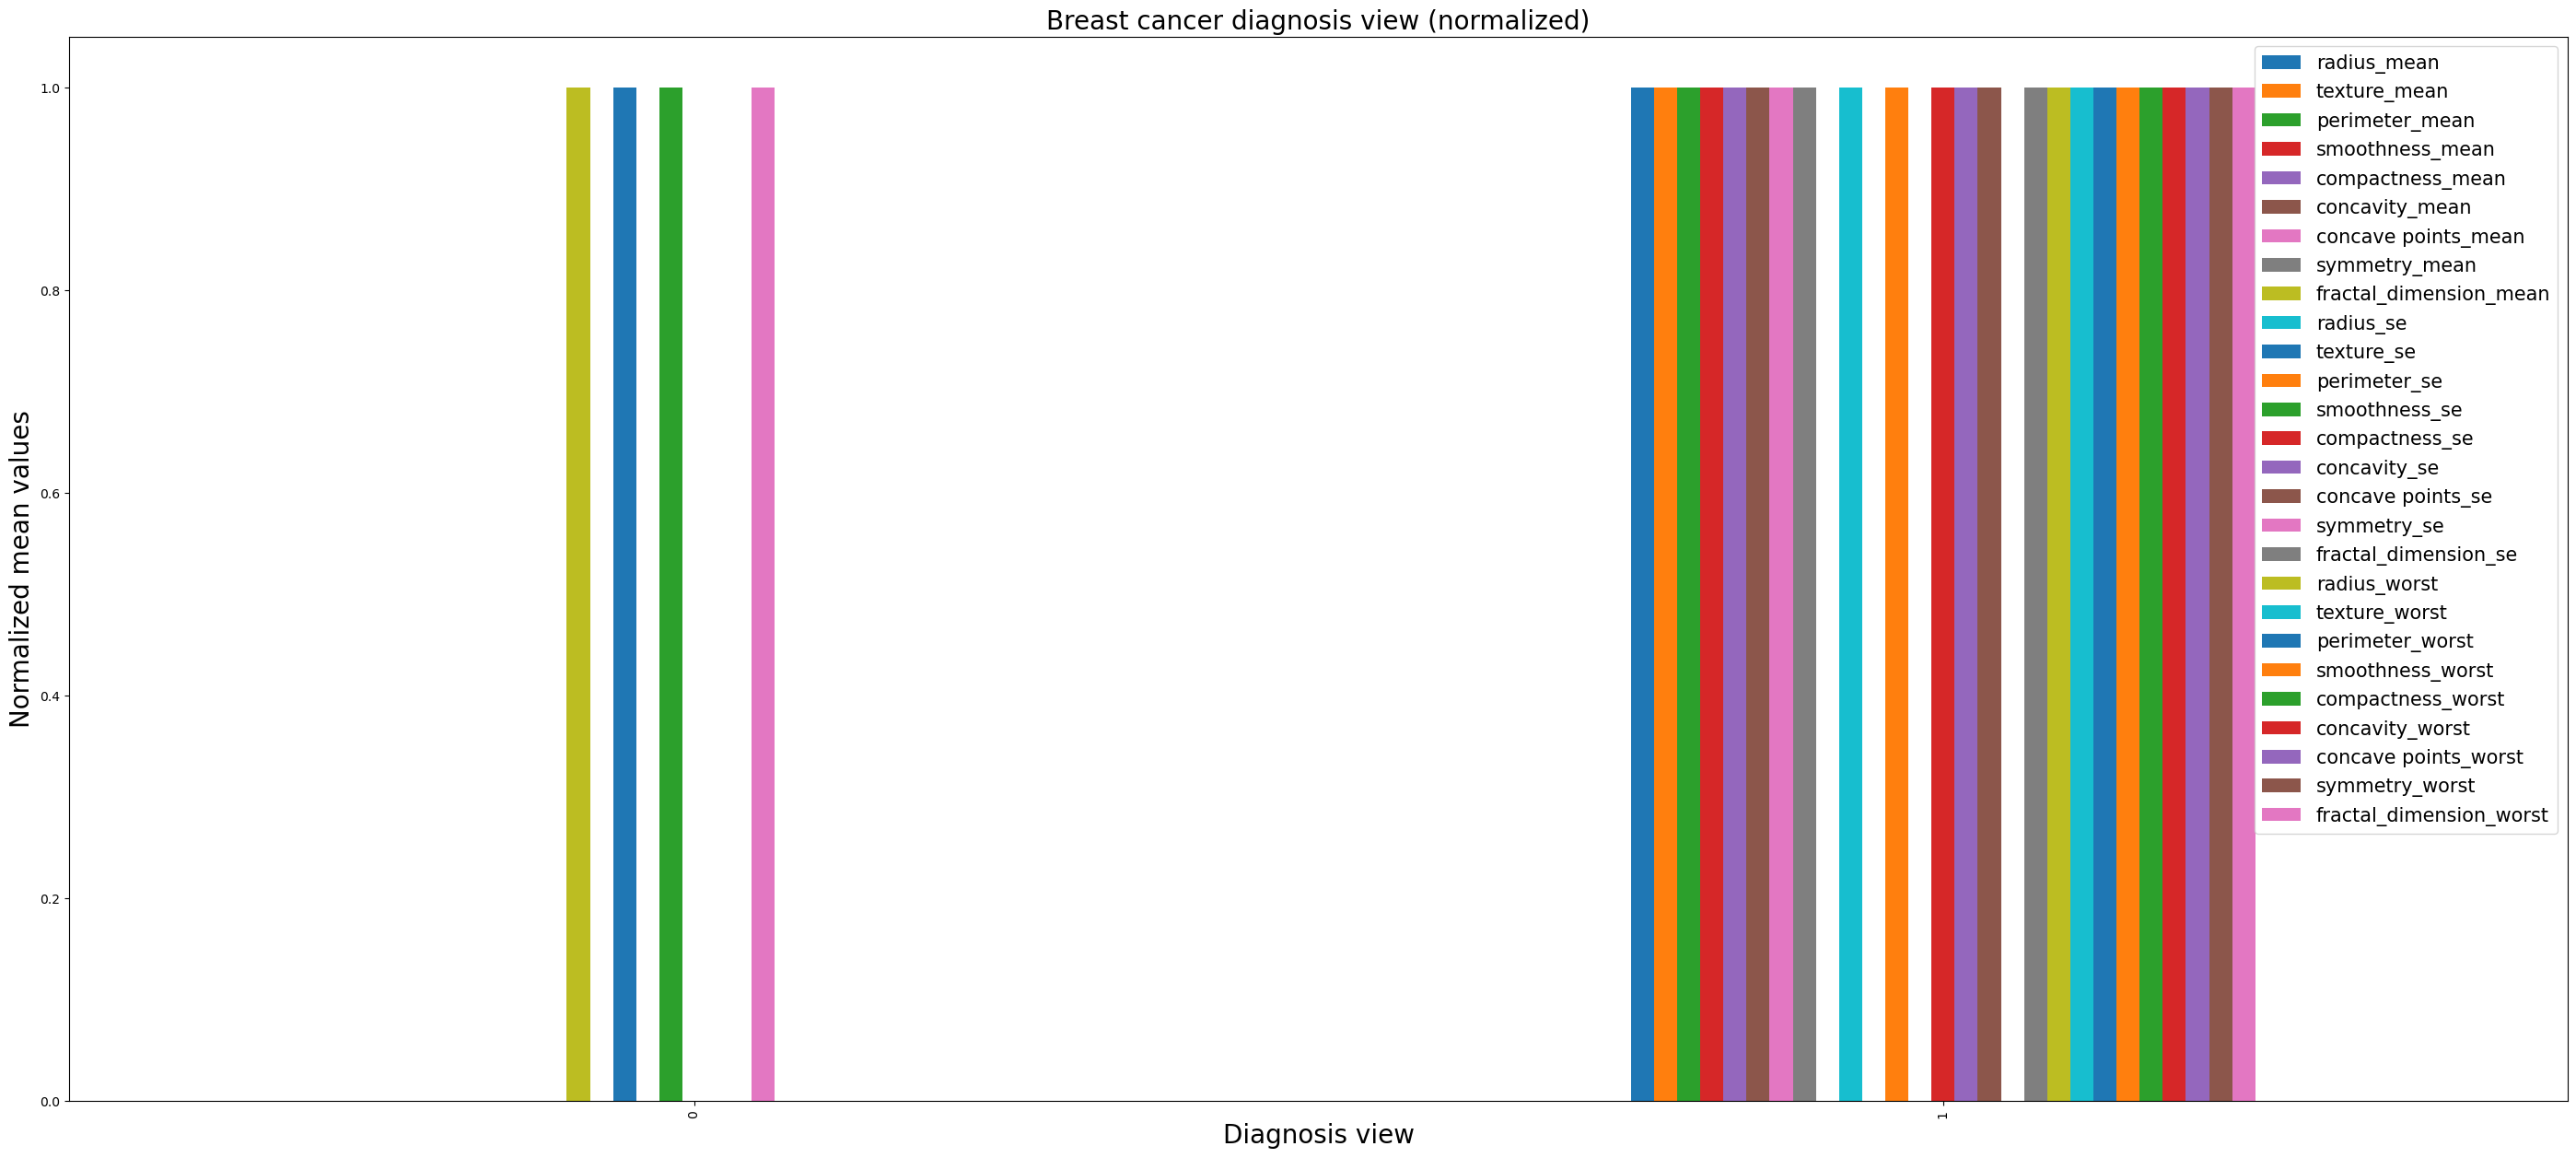

In [74]:
df_means = train_data.drop(columns=['id', 'area_worst', 'area_se', 'area_mean'], axis=1) \
    .groupby('diagnosis').mean()
#df_means = train_data.groupby('diagnosis').mean()
# Normalize between 0 and 1
df_means_normalized = (df_means - df_means.min()) / (df_means.max() - df_means.min())

df_means_normalized.plot(kind='bar', figsize=(35, 15))
plt.xlabel('Diagnosis view', fontsize=20)
plt.ylabel('Normalized mean values', fontsize=20)
plt.title('Breast cancer diagnosis view (normalized)', fontsize=20)
plt.legend(fontsize=15, loc='upper right')
plt.show()


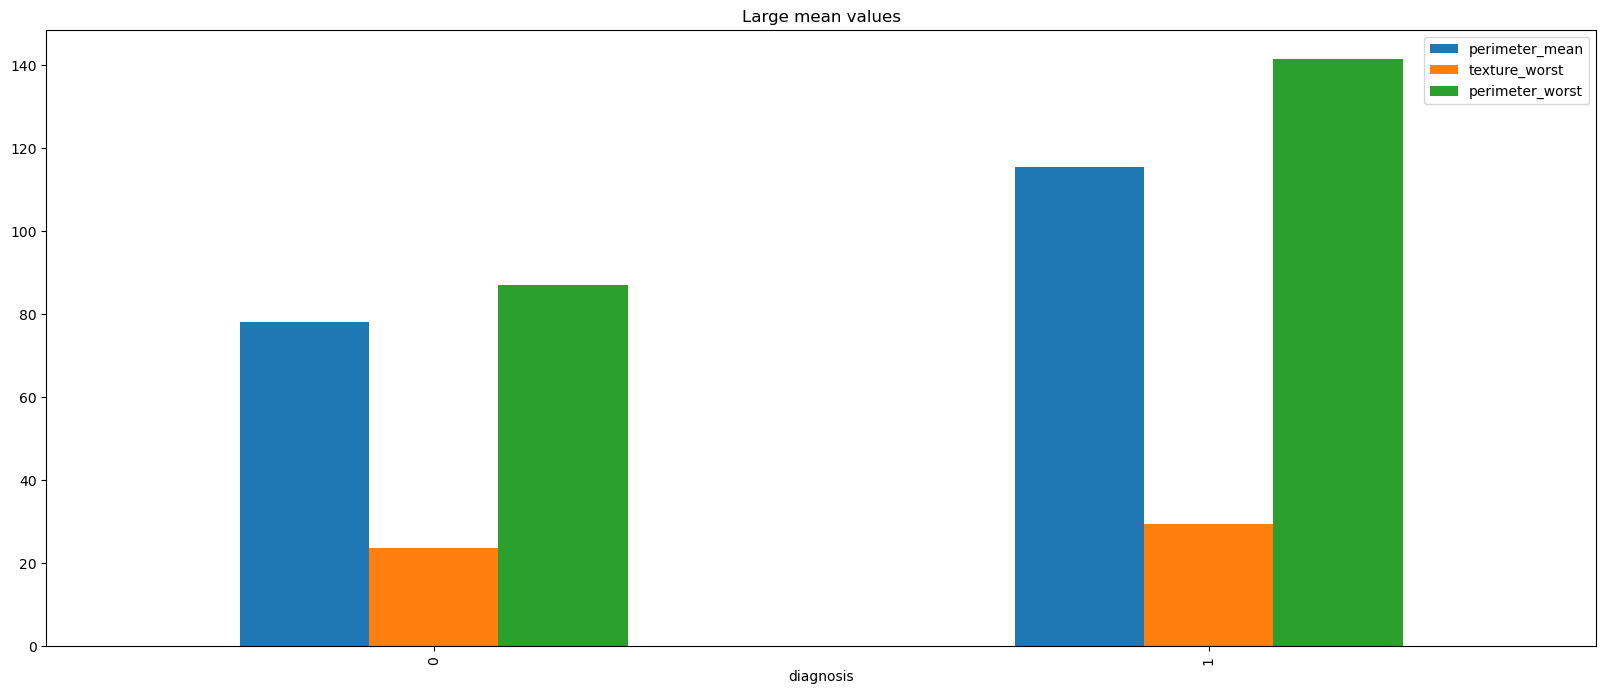

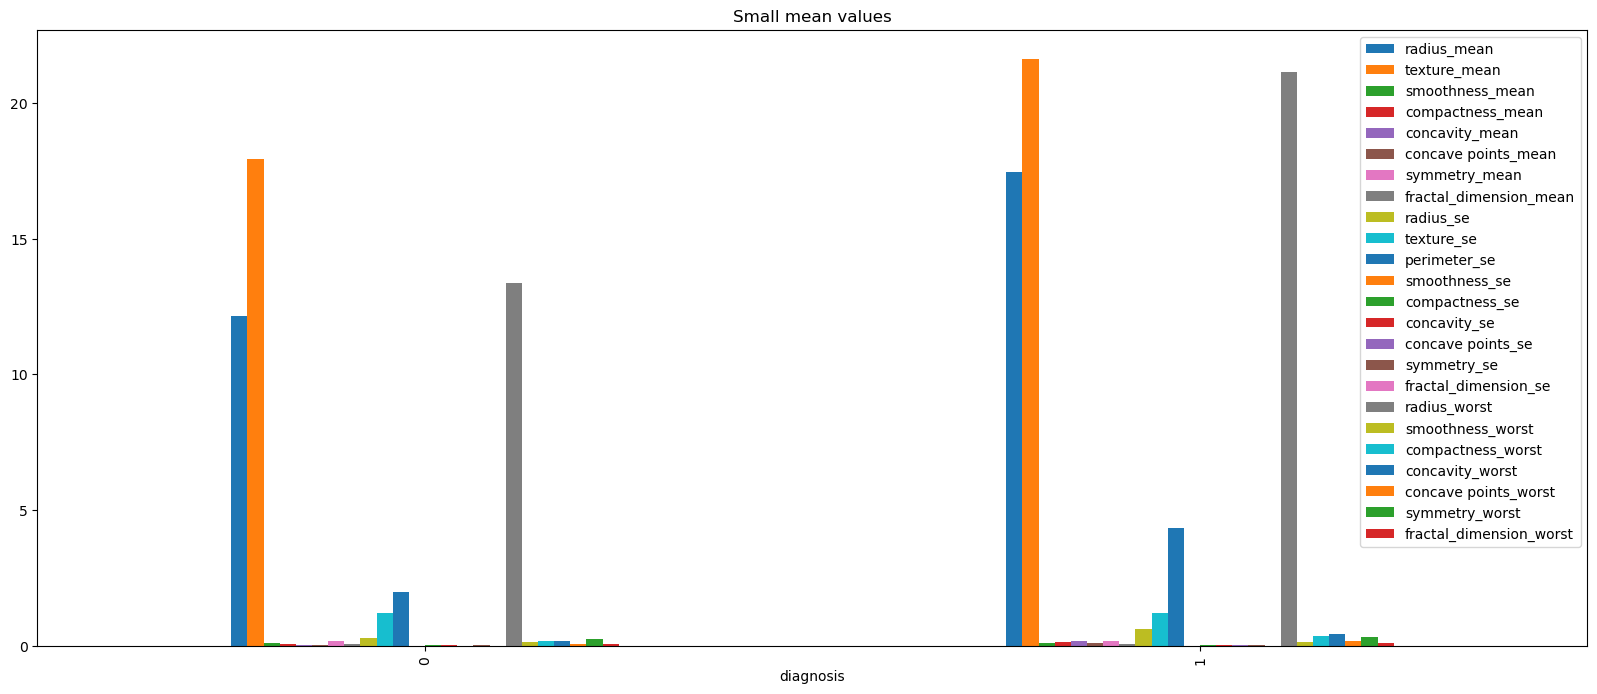

In [76]:
df_means = train_data.drop(columns=['id', 'area_worst', 'area_se', 'area_mean'], axis=1) \
    .groupby('diagnosis').mean()

large_vals = df_means.columns[df_means.mean() >= 20]
small_vals = df_means.columns[df_means.mean() < 20]

# Large-value plot
df_means[large_vals].plot(kind='bar', figsize=(20, 8), title="Large mean values")
plt.show()

# Small-value plot
df_means[small_vals].plot(kind='bar', figsize=(20, 8), title="Small mean values")
plt.show()

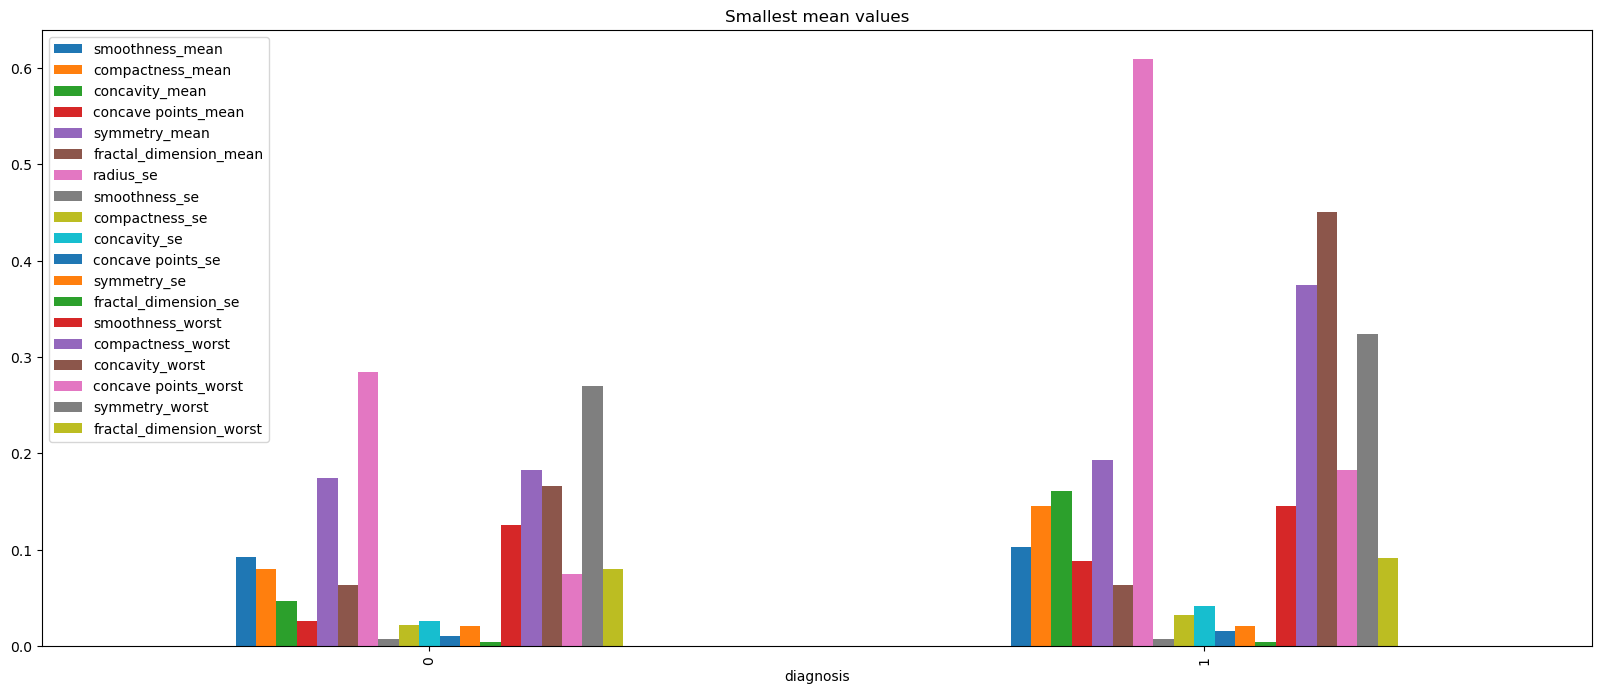

In [80]:
smallest_vals = df_means.columns[df_means.mean() < 1]
df_means[smallest_vals].plot(kind='bar', figsize=(20, 8), title="Smallest mean values")
plt.show()

In [82]:
import plotly.express as px

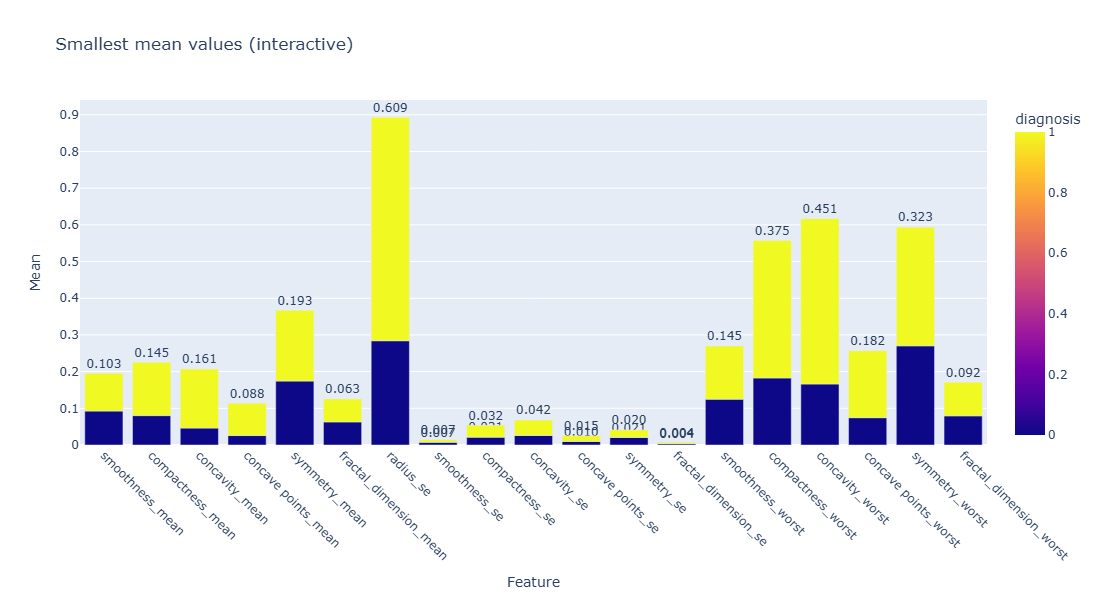

In [84]:
# Filter the DataFrame
df_means_small = df_means[smallest_vals].reset_index()  # reset index so 'diagnosis' is a column

# Melt so Plotly can group bars correctly
df_melted = df_means_small.melt(id_vars='diagnosis', var_name='Feature', value_name='Mean')

# Plotly bar chart
fig = px.bar(
    df_melted,
    x='Feature',
    y='Mean',
    color='diagnosis',
    barmode='group',
    text='Mean',  # show values on bars
    title="Smallest mean values (interactive)"
)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')  # format numbers
fig.update_layout(
    xaxis_tickangle=45,
    height=600,
    width=1000
)

fig.show()

In [88]:
import numpy as np

In [92]:
corr = train_data.corr(numeric_only = True).round(2)
mask = np.triu(np.ones_like(train_data.corr(numeric_only = True).round(2)))
plt.figure(figsize = (20, 9))
sns.heatmap(corr, annot = True, mask = mask);

In [94]:
corr = train_data.drop(columns=['id', 'diagnosis']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
X = train_data.drop(columns=['id', 'diagnosis'])
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df.sort_values('VIF', ascending=False))

                    feature           VIF
0               radius_mean  63306.172036
2            perimeter_mean  58123.586079
20             radius_worst   9674.742602
22          perimeter_worst   4487.781270
3                 area_mean   1287.262339
23               area_worst   1138.759252
9    fractal_dimension_mean    629.679874
29  fractal_dimension_worst    423.396723
4           smoothness_mean    393.398166
24         smoothness_worst    375.597155
21            texture_worst    343.004387
1              texture_mean    251.047108
10                radius_se    236.665738
28           symmetry_worst    218.919805
12             perimeter_se    211.396334
5          compactness_mean    200.980354
8             symmetry_mean    184.426558
6            concavity_mean    157.855046
7       concave points_mean    154.241268
27     concave points_worst    148.673180
25        compactness_worst    132.884276
26          concavity_worst     86.310362
13                  area_se     72

In [100]:
def calculate_vif(df, thresh=5):
    variables = list(df.columns)
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(df[variables].values, i) for i in range(len(variables))]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping '{variables[maxloc]}' with VIF={max_vif:.2f}")
            variables.pop(maxloc)
            dropped = True
    print("Remaining variables:")
    print(variables)
    return df[variables]

# Drop ID and diagnosis
X = train_data.drop(columns=['id', 'diagnosis'])
X_reduced = calculate_vif(X, thresh=5)

Dropping 'radius_mean' with VIF=63306.17
Dropping 'radius_worst' with VIF=7573.94
Dropping 'perimeter_mean' with VIF=3901.90
Dropping 'perimeter_worst' with VIF=668.39
Dropping 'fractal_dimension_mean' with VIF=508.09
Dropping 'smoothness_worst' with VIF=368.05
Dropping 'texture_worst' with VIF=309.54
Dropping 'fractal_dimension_worst' with VIF=184.68
Dropping 'symmetry_worst' with VIF=167.31
Dropping 'concavity_mean' with VIF=142.30
Dropping 'radius_se' with VIF=104.99
Dropping 'concave points_worst' with VIF=100.95
Dropping 'smoothness_mean' with VIF=87.00
Dropping 'compactness_mean' with VIF=74.72
Dropping 'area_mean' with VIF=67.47
Dropping 'compactness_worst' with VIF=49.02
Dropping 'perimeter_se' with VIF=43.73
Dropping 'symmetry_mean' with VIF=36.08
Dropping 'texture_mean' with VIF=23.71
Dropping 'concave points_se' with VIF=18.16
Dropping 'compactness_se' with VIF=15.73
Dropping 'area_worst' with VIF=13.98
Dropping 'concave points_mean' with VIF=11.18
Dropping 'symmetry_se' wit

In [104]:
def calculate_vif(df, thresh=20):
    variables = list(df.columns)
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(df[variables].values, i) for i in range(len(variables))]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping '{variables[maxloc]}' with VIF={max_vif:.2f}")
            variables.pop(maxloc)
            dropped = True
    print("Remaining variables:")
    print(variables)
    return df[variables]

# Drop ID and diagnosis
X = train_data.drop(columns=['id', 'diagnosis'])
X_reduced = calculate_vif(X, thresh=20)

Dropping 'radius_mean' with VIF=63306.17
Dropping 'radius_worst' with VIF=7573.94
Dropping 'perimeter_mean' with VIF=3901.90
Dropping 'perimeter_worst' with VIF=668.39
Dropping 'fractal_dimension_mean' with VIF=508.09
Dropping 'smoothness_worst' with VIF=368.05
Dropping 'texture_worst' with VIF=309.54
Dropping 'fractal_dimension_worst' with VIF=184.68
Dropping 'symmetry_worst' with VIF=167.31
Dropping 'concavity_mean' with VIF=142.30
Dropping 'radius_se' with VIF=104.99
Dropping 'concave points_worst' with VIF=100.95
Dropping 'smoothness_mean' with VIF=87.00
Dropping 'compactness_mean' with VIF=74.72
Dropping 'area_mean' with VIF=67.47
Dropping 'compactness_worst' with VIF=49.02
Dropping 'perimeter_se' with VIF=43.73
Dropping 'symmetry_mean' with VIF=36.08
Dropping 'texture_mean' with VIF=23.71
Remaining variables:
['concave points_mean', 'texture_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst',

### I will train the model with tree based model which the predictive power won't be affected by the corlinearity 

In [107]:
y_column = train_data.drop(columns = ['id', 'diagnosis'], axis =1)

In [109]:
from sklearn.model_selection import train_test_split

In [111]:
X_train_data = y_column
y_train_data = train_data['diagnosis']

In [113]:
print(X_train_data.columns.tolist())

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [119]:
X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size = 0.2, random_state = 22, stratify = y_train_data)

In [123]:
y_train.value_counts(normalize = True).round(2)

diagnosis
0    0.63
1    0.37
Name: proportion, dtype: float64

In [125]:
y_val.value_counts(normalize = True).round(2)

diagnosis
0    0.63
1    0.37
Name: proportion, dtype: float64

#### Baseline model

In [127]:
from sklearn.dummy import DummyClassifier 

In [129]:
dummy = DummyClassifier(strategy="most_frequent", random_state=22)
dummy.fit(X_train, y_train)
dm_train_score = dummy.score(X_train, y_train)
dm_val_score = dummy.score(X_val, y_val)
# Evaluate DummyClassifier performance
print(f'Dummy Classifier score, the train score is :{dm_train_score:.3f}, the val score is :{dm_val_score:.3f}')

Dummy Classifier score, the train score is :0.626, the val score is :0.632


#### Random forest classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 22)
rf_model.fit(X_train, y_train)
rf_train_score = rf_model.score(X_train, y_train)
rf_val_score = rf_model.score(X_val, y_val)
print(f'Random forest score, the train score is :{rf_train_score:.3f}, the val score is :{rf_val_score:.3f}')

Random forest score, the train score is :1.000, the val score is :0.991


                   features  importance
7       concave points_mean    0.156642
20             radius_worst    0.116978
22          perimeter_worst    0.115272
27     concave points_worst    0.114350
23               area_worst    0.096439
6            concavity_mean    0.052317
26          concavity_worst    0.042536
3                 area_mean    0.036770
0               radius_mean    0.032842
2            perimeter_mean    0.028205
13                  area_se    0.027629
12             perimeter_se    0.023263
21            texture_worst    0.022717
24         smoothness_worst    0.015666
1              texture_mean    0.014776
25        compactness_worst    0.014432
5          compactness_mean    0.013467
10                radius_se    0.010966
16             concavity_se    0.009899
28           symmetry_worst    0.008468
4           smoothness_mean    0.008412
19     fractal_dimension_se    0.005567
17        concave points_se    0.005399
8             symmetry_mean    0.005255


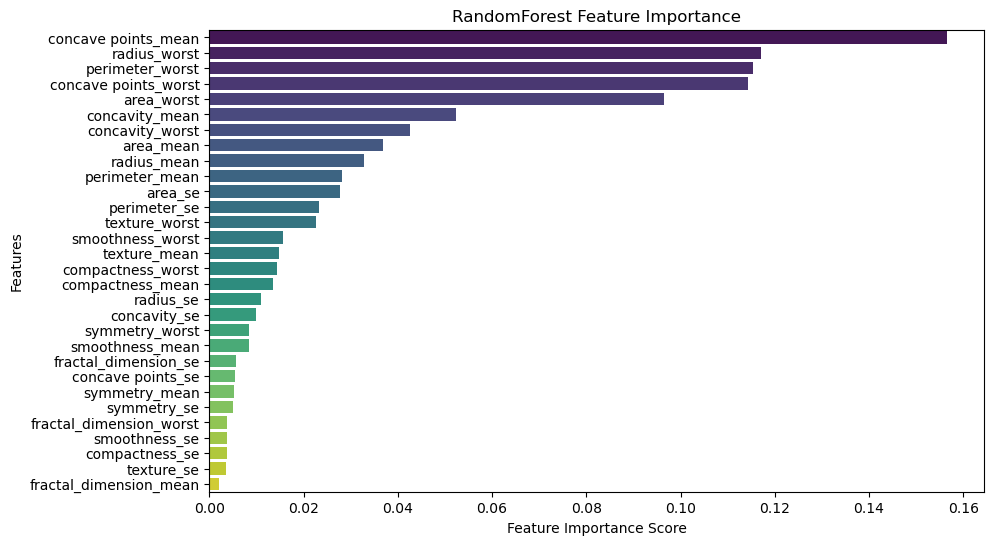

In [142]:
importance = rf_model.feature_importances_
feature_name = X_train.columns
importances_df = (
    pd.DataFrame({
        "features": feature_name, "importance": importance})
    .sort_values(by = "importance", ascending = False)
)
print(importances_df)
plt.figure(figsize=(10,6))
sns.barplot(x = "importance", y = "features", data = importances_df, palette = "viridis")
plt.title("RandomForest Feature Importance")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

In [146]:
features = rf_model.feature_names_in_   # or your own list of feature names
importance = rf_model.feature_importances_
# Create DataFrame
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': importance
})
# Sort and calculate cumulative importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance['cumulative'] = feature_importance['importance'].cumsum()
# Select features until cumulative importance <= 95%
selected_features = feature_importance[feature_importance['cumulative'] <= 0.95]['feature'].tolist()
print(selected_features)

['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst', 'area_worst', 'concavity_mean', 'concavity_worst', 'area_mean', 'radius_mean', 'perimeter_mean', 'area_se', 'perimeter_se', 'texture_worst', 'smoothness_worst', 'texture_mean', 'compactness_worst', 'compactness_mean', 'radius_se', 'concavity_se']


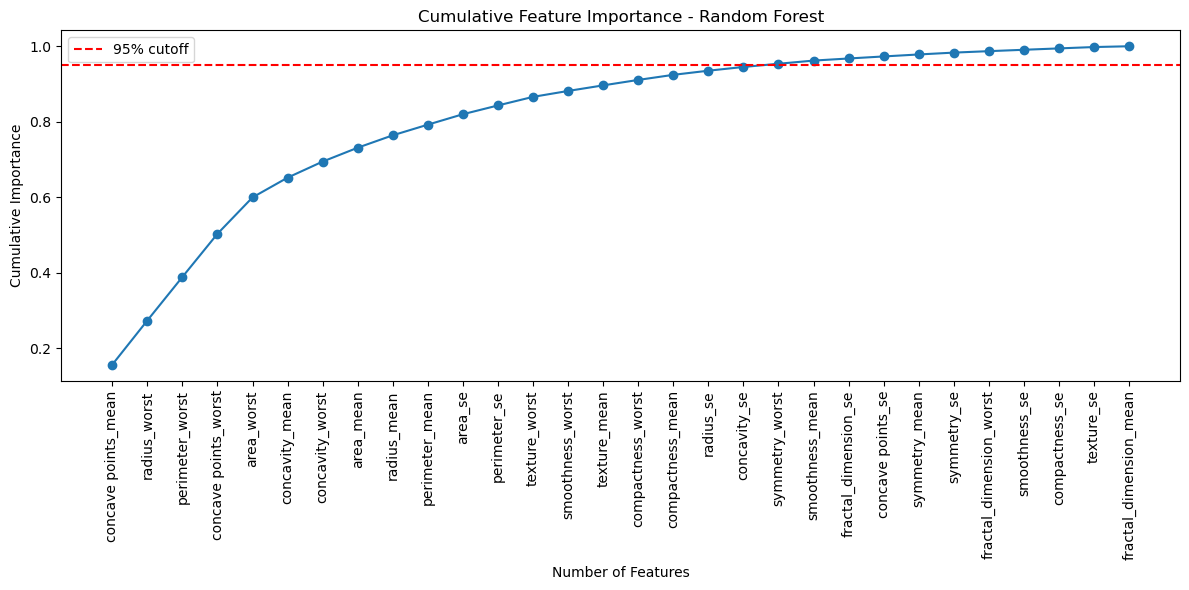

Selected 19 features for 95% importance:
['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst', 'area_worst', 'concavity_mean', 'concavity_worst', 'area_mean', 'radius_mean', 'perimeter_mean', 'area_se', 'perimeter_se', 'texture_worst', 'smoothness_worst', 'texture_mean', 'compactness_worst', 'compactness_mean', 'radius_se', 'concavity_se']


In [149]:
# Your feature names & importances from Random Forest
feature_names = [
    'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst',
    'area_worst', 'concavity_mean', 'concavity_worst', 'area_mean', 'radius_mean',
    'perimeter_mean', 'area_se', 'perimeter_se', 'texture_worst', 'smoothness_worst',
    'texture_mean', 'compactness_worst', 'compactness_mean', 'radius_se', 'concavity_se',
    'symmetry_worst', 'smoothness_mean', 'fractal_dimension_se', 'concave points_se',
    'symmetry_mean', 'symmetry_se', 'fractal_dimension_worst', 'smoothness_se',
    'compactness_se', 'texture_se', 'fractal_dimension_mean'
]

importances = [
    0.156642, 0.116978, 0.115272, 0.114350, 0.096439, 0.052317, 0.042536, 0.036770,
    0.032842, 0.028205, 0.027629, 0.023263, 0.022717, 0.015666, 0.014776, 0.014432,
    0.013467, 0.010966, 0.009899, 0.008468, 0.008412, 0.005567, 0.005399, 0.005255,
    0.004909, 0.003838, 0.003662, 0.003643, 0.003602, 0.002081
]

# Create DataFrame
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance & calculate cumulative
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance['cumulative'] = feature_importance['importance'].cumsum()

# Plot cumulative importance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(feature_importance) + 1), feature_importance['cumulative'], marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% cutoff')
plt.xticks(range(1, len(feature_importance) + 1), feature_importance['feature'], rotation=90)
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance - Random Forest')
plt.legend()
plt.tight_layout()
plt.show()

# Print selected features
selected_features = feature_importance[feature_importance['cumulative'] <= 0.95]['feature'].tolist()
print(f"Selected {len(selected_features)} features for 95% importance:")
print(selected_features)

In [160]:
rf_top_features = RandomForestClassifier(n_estimators = 100, random_state =42)
rf_top_features.fit(X_train[selected_features], y_train)
rf_top_train = rf_top_features.score(X_train[selected_features], y_train)
rf_top_val = rf_top_features.score(X_val[selected_features], y_val)
print(f'The selected feature score on train set is :{rf_top_train:.3f}, on validation set is :{rf_top_val:.3f}')

The selected feature score on train set is :1.000, on validation set is :0.982


In [162]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [164]:
y_pred_rf = rf_model.predict(X_val)
y_pred_rf_reduced = rf_top_features.predict(X_val[selected_features])

rf_acc = accuracy_score(y_val, y_pred_rf)
rf_reduced_acc = accuracy_score(y_val, y_pred_rf_reduced)

print(f"Random Forest Accuracy: {rf_acc:.3f}")
print(f"Random Forest Reduced Features Accuracy: {rf_reduced_acc:.3f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

print("\nRandom Forest Reduced Features Classification Report:")
print(classification_report(y_val, y_pred_rf_reduced))

Random Forest Accuracy: 0.991
Random Forest Reduced Features Accuracy: 0.982

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Random Forest Reduced Features Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [166]:
from sklearn.model_selection import cross_val_score

In [168]:
# Full feature model
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
cv_full = cross_val_score(rf_full, X_train, y_train, cv=5, scoring='accuracy')
print("Full features CV Accuracy: %.3f ± %.3f" % (np.mean(cv_full), np.std(cv_full)))

# Reduced feature model
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
cv_reduced = cross_val_score(rf_reduced, X_train[selected_features], y_train, cv=5, scoring='accuracy')
print("Reduced features CV Accuracy: %.3f ± %.3f" % (np.mean(cv_reduced), np.std(cv_reduced)))

Full features CV Accuracy: 0.949 ± 0.011
Reduced features CV Accuracy: 0.949 ± 0.015


#### Compare feature importance shift

In [171]:
# Fit models
rf_full.fit(X_train, y_train)
rf_reduced.fit(X_train[selected_features], y_train)

# Get feature importances
fi_full = pd.DataFrame({
    'feature': X_train.columns,
    'importance_full': rf_full.feature_importances_
})

fi_reduced = pd.DataFrame({
    'feature': selected_features,
    'importance_reduced': rf_reduced.feature_importances_
})

# Merge to see changes
fi_compare = pd.merge(fi_full, fi_reduced, on='feature', how='outer').fillna(0)
fi_compare = fi_compare.sort_values(by='importance_full', ascending=False)
print(fi_compare)

                    feature  importance_full  importance_reduced
2                area_worst         0.149835            0.105202
8      concave points_worst         0.118942            0.088831
6       concave points_mean         0.108786            0.157509
17          perimeter_worst         0.092100            0.218303
20             radius_worst         0.067397            0.081965
18              radius_mean         0.057306            0.027584
15           perimeter_mean         0.055676            0.044726
9            concavity_mean         0.054956            0.059213
1                   area_se         0.051935            0.029956
0                 area_mean         0.040513            0.043669
11          concavity_worst         0.035939            0.033627
29            texture_worst         0.019889            0.023788
5         compactness_worst         0.018262            0.011830
19                radius_se         0.015874            0.009213
23         smoothness_wor

In [173]:
from sklearn.metrics import roc_auc_score, roc_curve

Full features ROC-AUC: 0.998
Reduced features ROC-AUC: 0.998


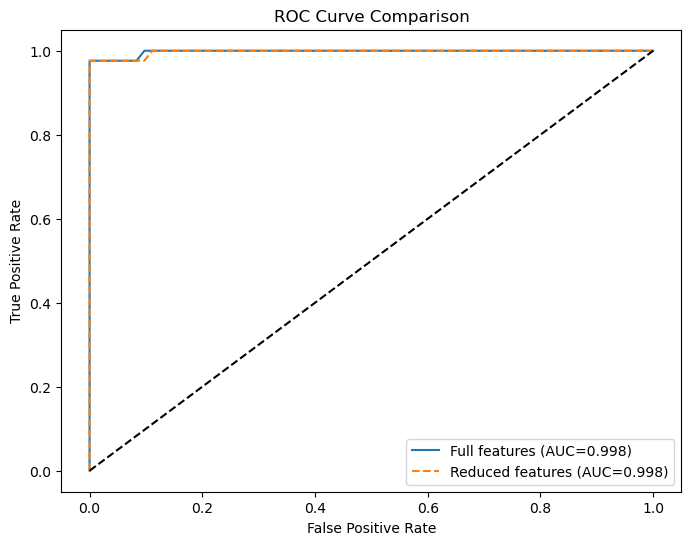

In [175]:
# Full model predictions
y_prob_full = rf_full.predict_proba(X_val)[:, 1]
roc_full = roc_auc_score(y_val, y_prob_full)

# Reduced model predictions
y_prob_reduced = rf_reduced.predict_proba(X_val[selected_features])[:, 1]
roc_reduced = roc_auc_score(y_val, y_prob_reduced)

print(f"Full features ROC-AUC: {roc_full:.3f}")
print(f"Reduced features ROC-AUC: {roc_reduced:.3f}")

# Plot ROC curves
fpr_full, tpr_full, _ = roc_curve(y_val, y_prob_full)
fpr_red, tpr_red, _ = roc_curve(y_val, y_prob_reduced)

plt.figure(figsize=(8, 6))
plt.plot(fpr_full, tpr_full, label=f"Full features (AUC={roc_full:.3f})")
plt.plot(fpr_red, tpr_red, label=f"Reduced features (AUC={roc_reduced:.3f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [181]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

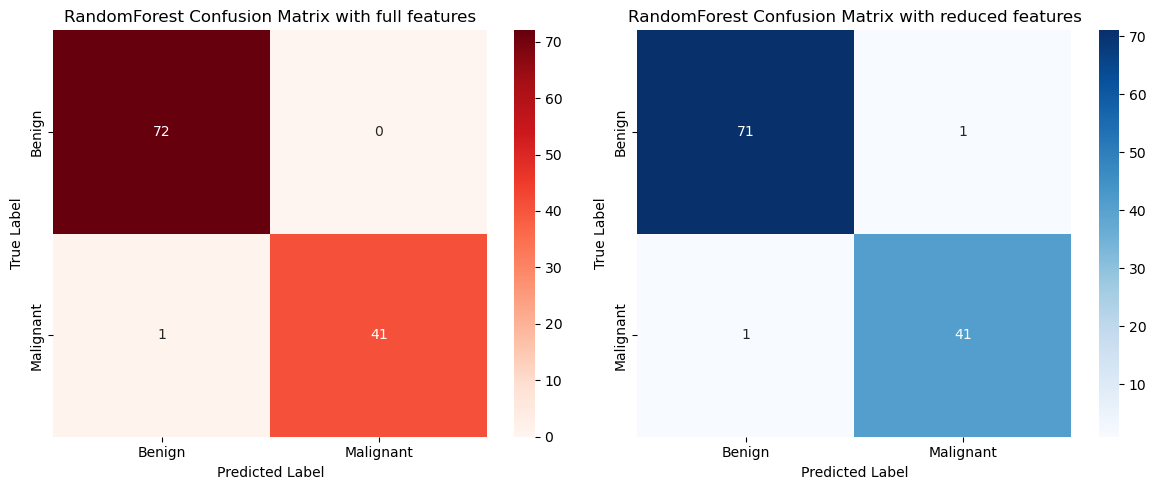

In [185]:
cm_rf = confusion_matrix(y_val, y_pred_rf)  
cm_rf_reduced = confusion_matrix(y_val, y_pred_rf_reduced)  
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
# Ploting RandomForest Confusion Matrix with reduced feature
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"], ax=axes[0])
axes[0].set_title("RandomForest Confusion Matrix with full features")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")
# Ploting RandomForest Confusion Matrix with tuned feature
sns.heatmap(cm_rf_reduced, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"], ax=axes[1])
axes[1].set_title("RandomForest Confusion Matrix with reduced features")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")
# Adjust layout
plt.tight_layout()
plt.show()

#### Xgboost Classifier 

In [177]:
import xgboost as xgb
from xgboost import XGBClassifier

In [187]:
xgb_model = XGBClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of a tree
    subsample=0.8,      # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used per tree
    random_state=22
)

xgb_model.fit(X_train, y_train)
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_val_score = xgb_model.score(X_val, y_val)
print(f' The train score is :{xgb_train_score:.3f}, the val score is :{xgb_val_score:.3f}')

 The train score is :1.000, the val score is :0.974


In [189]:
import lightgbm as lgb
import catboost as ctb

In [191]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=22
)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 170, number of negative: 285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier(colsample_bytree=0.8, max_depth=3, random_state=22,
               subsample=0.8)

In [195]:
y_train_score = lgb_model.score(X_train, y_train)
y_val_score = lgb_model.score(X_val, y_val)
print(f'The train score for LGB is :{y_train_score:.3f}, the val score is :{y_val_score:.3f}')

The train score for LGB is :1.000, the val score is :0.991


In [193]:
ctb_model = ctb.CatBoostClassifier(
    iterations=100,  # Number of trees
    learning_rate=0.1,
    depth=3,
    verbose=200,  
    random_state=22
)

ctb_model.fit(X_train, y_train)

0:	learn: 0.5469873	total: 141ms	remaining: 14s
99:	learn: 0.0205085	total: 716ms	remaining: 0us


In [197]:
y_train_score = ctb_model.score(X_train, y_train)
y_val_score = ctb_model.score(X_val, y_val)
print(f'The train score for LGB is :{y_train_score:.3f}, the val score is :{y_val_score:.3f}')

The train score for LGB is :0.998, the val score is :0.982
